# **DECISION TREE**

In [1]:
#import library yang diperlukan serta data bawaan dari sklearn yaitu data iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris() #menyimpan data iris di variabel iris
features = pd.DataFrame(iris.data) # variabel X (independent)
labels = pd.DataFrame(iris.target) # variabel Y (Dependent)

In [3]:
#Menampilkan deskripsi dari data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**SPLIT DATASET**


In [4]:
#melakukan train test split dengan data test = 40% dan random state = 0
features_train, features_test, labels_train, labels_test, = train_test_split(features,labels,test_size = 0.4,random_state = 0)
print(features.shape)
print(labels.shape)

(150, 4)
(150, 1)


features atau prediktor terdiri dari 150 baris dan 4 kolom (variabel x)

sedangkan label atau respons terdiri dari 150 baris dan 1 kolom (variabel y)

**FITTING DATA**

In [5]:
#menggunakan model fitting data dengan criterion atau ukuran = entropy (keacakan)
clf = DecisionTreeClassifier(criterion = "entropy")

#melakukan fitting data features dan label train kedalam model
clf.fit(features_train, labels_train)

#melakukan prediksi menggunakan variabel features test
pred = clf.predict(features_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]


In [6]:
#menggunakan model fitting data dengan criterion (ukuran) = gini (ketidakmurnian)
clf = DecisionTreeClassifier(criterion = "gini")

#melakukan fitting data features dan label train kedalam model
clf.fit(features_train, labels_train)

#melakukan prediksi 
pred = clf.predict(features_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]


Setelah dilakukan prediksi dengan menggunakan criterion entropy dan gini, ternyata kedua ukuran tersebut memberikan hasil prediksi yang sama. 

Dimana 0 untuk kelas sentosa, dan 1 untuk kelas versicolor, dan 2 untuk kelas virginica.

**ACCURACY**

In [7]:
#mengimport library yang dibutuhkan
from sklearn.metrics import accuracy_score

#melihat akurasi dari model
accuracy = accuracy_score(labels_test, pred)
print(f'akurasi yang didapatkan dari model decision tree sebesar: {accuracy}')

akurasi yang didapatkan dari model decision tree sebesar: 0.95


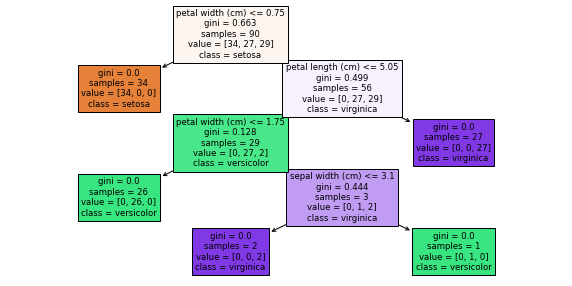

In [8]:
#visualisasi 
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,5))
tree.plot_tree(clf,
               feature_names = iris.feature_names,
               class_names = iris.target_names,
               filled = True)

plt.show()

Entropy : lebih kompleks dibanding gini dan lebih lama, karena menggunakan log

Gini : lebih sederhana, karena tidak menggunakan log

# **KNN REGRESI**

In [9]:
pip install pydataset

     ---------------------------------------- 15.9/15.9 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pydataset, since package 'wheel' is not installed.
  Running setup.py install for pydataset: started
  Running setup.py install for pydataset: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\msi-pc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
#mengimport library yang dibutuhkan
from pydataset import data
import numpy as np

initiated datasets repo at: C:\Users\msi-pc\.pydataset/


In [11]:
#memanggil data
df = data("turnout")

In [12]:
#menampilkan data
df

,race,age,educate,income,vote
1,white,60,14.0,3.3458,1
2,white,51,10.0,1.8561,0
3,white,24,12.0,0.6304,0
4,white,38,8.0,3.4183,1
5,white,25,12.0,2.7852,1
...,...,...,...,...,...
1996,white,26,16.0,3.3834,0
1997,white,34,12.0,2.9170,1
1998,white,51,16.0,7.8949,1
1999,white,22,10.0,2.4811,0


In [13]:
#menampilkan deskripsi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   race     2000 non-null   object 
 1   age      2000 non-null   int64  
 2   educate  2000 non-null   float64
 3   income   2000 non-null   float64
 4   vote     2000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 93.8+ KB


melihat info dari dataset, yaitu terdiri dari 2000 data non null dengan tipe data bervariasi yang bisa dilihat pada tabel Dtype.

**SPLIT DATA**

In [14]:
#mengimport library untuk splitting data
from sklearn.model_selection import train_test_split

In [15]:
#melakukan splitting data dengan test size 30% dan random statenya 0
x = df[['age', 'income', 'vote']]
y = df['educate']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state = 0)


**TRAIN & TEST MODEL**

In [16]:
#mengimport library model KNN
from sklearn.neighbors import KNeighborsRegressor

In [17]:
#menggunakan training model dengan k = 11
knn_r = KNeighborsRegressor(n_neighbors = 11)

#fitting data 
knn_r.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [18]:
#melakukan prediksi 
y_pred = knn_r.predict(x_test)

**EVALUASI MODEL**

In [19]:
#mengimport library untuk melihat akurasi data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#mean squared error (MSE)
#digunakan untuk mengevaluasi estimasi jumlah kesalahan pada prediksi 
#semakin rendah MSE maka akan semakin bagus

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

#root mean squared error (RMSE)
#digunakan untuk melihat selisih kuadrat antara nilai prediksi dan nilai sebenarnya
#semakin rendah RMSE maka akan semakin bagus 

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

#R-squared score atau koefisien determinasi
#nilai yg digunakan untuk menjelaskan seberapa kuat variabel prediktor menjelaskan variabel respons
#ketika R-squared semakin mendekati 100%, maka model semakin bagus

r2 = r2_score(y_test, y_pred)
print("R squared score: ", r2)

#mean absolute error (MAE)
#digunakan untuk menghitung kesalahan guna evaluasi model

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

MSE:  9.241401515151516
RMSE:  3.039967354290423
R squared score:  0.20888002472242495
MAE:  2.3511363636363636


setelah dilakukan modelling, telah didapatkan nilai MSE = 9.247, RMSE = 3.04, R-Squared = 0.208, dam MAE = 2.35. 

Dari hasil tersebut, dapat kita simpulkan bahwa model KNN kurang baik digunakan untuk memprediksi dataset. 

hal tersebut dapat disebabkan oleh nilai k yang dipilih kurang sesuai.


**MENCARI k TERBAIK SECARA MANUAL**

In [20]:
#list kosong untuk mse dan k
mse_val = []
k = []

#looping untuk train model dg k 1-50
#lalu hasilnya akan disimpan ke list kosong di atas dan di training dan diprediksi
for i in range (1, 51):
  k.append(i) 
  knn_r = KNeighborsRegressor(i) 
  knn_r.fit(x_train, y_train)

  y_pred = knn_r.predict(x_test) 
  mse = mean_squared_error(y_test, y_pred) 
  mse_val.append(mse) 

  print("n-neighbors: " + str(i) + ", MSE: " +str(mse))

n-neighbors: 1, MSE: 16.899166666666666
n-neighbors: 2, MSE: 12.500625
n-neighbors: 3, MSE: 10.752037037037038
n-neighbors: 4, MSE: 10.634973958333333
n-neighbors: 5, MSE: 10.194749999999999
n-neighbors: 6, MSE: 9.788194444444443
n-neighbors: 7, MSE: 9.725459183673468
n-neighbors: 8, MSE: 9.421959635416666
n-neighbors: 9, MSE: 9.316409465020575
n-neighbors: 10, MSE: 9.269520833333333
n-neighbors: 11, MSE: 9.241401515151516
n-neighbors: 12, MSE: 9.292149884259258
n-neighbors: 13, MSE: 9.240419132149901
n-neighbors: 14, MSE: 9.189143282312925
n-neighbors: 15, MSE: 9.129885185185184
n-neighbors: 16, MSE: 9.1114306640625
n-neighbors: 17, MSE: 9.053675028835062
n-neighbors: 18, MSE: 9.021100823045268
n-neighbors: 19, MSE: 9.005837950138506
n-neighbors: 20, MSE: 8.987446875
n-neighbors: 21, MSE: 8.923133975812545
n-neighbors: 22, MSE: 8.893726756198346
n-neighbors: 23, MSE: 8.931606017643352
n-neighbors: 24, MSE: 8.901488715277779
n-neighbors: 25, MSE: 8.904122666666666
n-neighbors: 26, MSE:

n-neighbors: 33, MSE: 8.708532292623202
n-neighbors: 34, MSE: 8.735578503460207
n-neighbors: 35, MSE: 8.727983333333334
n-neighbors: 36, MSE: 8.762283950617284
n-neighbors: 37, MSE: 8.74354516678841
n-neighbors: 38, MSE: 8.737972933979687
n-neighbors: 39, MSE: 8.711519285557747
n-neighbors: 40, MSE: 8.727104947916667
n-neighbors: 41, MSE: 8.766081945270672
n-neighbors: 42, MSE: 8.774124149659865
n-neighbors: 43, MSE: 8.768846673877771
n-neighbors: 44, MSE: 8.776396565082644
n-neighbors: 45, MSE: 8.750761111111112
n-neighbors: 46, MSE: 8.757528355387524
n-neighbors: 47, MSE: 8.75104968311453
n-neighbors: 48, MSE: 8.77841796875
n-neighbors: 49, MSE: 8.819627238650561
n-neighbors: 50, MSE: 8.843686166666666


Text(0.5, 1.0, 'MSE vs k')

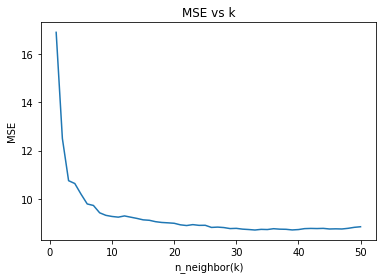

In [21]:
#visualisasi hasil mse dan k 
plt.plot(k, mse_val)
plt.xlabel("n_neighbor(k)")
plt.ylabel("MSE")
plt.title("MSE vs k")

pada grafik diatas dapat kita lihat bahwa nilai MSE mengalami penurunan yang signifikan ketika k berada disekitar interval 1-10.

sehingga telah kita dapatkan nilai k terbaik yaitu berada pada k =49 dengan nilai MSE sebesar 8.15